In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sqlite3

In [102]:
con = sqlite3.connect('wooldridge.db')
hprice2 = pd.read_sql('select * from hprice2',con)
hprice2.head(10)

,index,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678
5,5,28701,0.030,4.58,6.43,6.06,3,22.2,18.7,5.21,10.264690,1.521699,5.402678
6,6,22900,0.088,5.24,6.01,5.56,5,31.1,15.2,12.43,10.038890,1.656321,5.739793
7,7,27100,0.145,5.24,6.17,5.95,5,31.1,15.2,19.15,10.207290,1.656321,5.739793
8,8,16500,0.211,5.24,5.63,6.08,5,31.1,15.2,29.93,9.711116,1.656321,5.739793
9,9,18900,0.170,5.24,6.00,6.59,5,31.1,15.2,17.10,9.846917,1.656321,5.739793


In [106]:
xdata = hprice2['crime']
for name in hprice2.columns[3:9]:
    xdata = pd.concat((xdata,hprice2[name]),1)    

xdata = xdata.values
(n,r) = xdata.shape

In [107]:
xdata = xdata-xdata.mean(0)
xdata = xdata/xdata.std(0)
vcov = xdata.T.dot(xdata)/n
(vals,vecs) = np.linalg.eigh(vcov)
vals = np.flip(vals,0)
vecs = np.fliplr(vecs)

In [108]:
vtot = vals.sum()-vals.cumsum()
vtot = np.insert(vtot,0,vals.sum())
vals = np.insert(vals,0,vtot[0]/np.log(r))

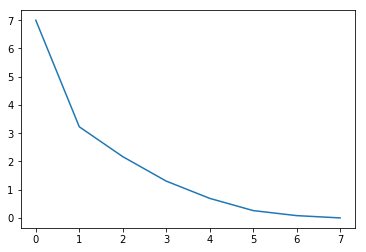

In [109]:
fig = plt.figure()
plt.plot(np.arange(r+1),vtot)
plt.show()

In [110]:
eratio = vals[:-1]/vals[1:]
grate = np.log(1+vals/vtot)
gratio = grate[:-1]/grate[1:]
[eratio.argmax(),gratio.argmax()]

C:\Users\Jason Parker\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


[1, 1]

In [111]:
pcs = vecs[:,:3]
factors = xdata.dot(pcs)
pcs

array([[ 0.3625453 , -0.00374878,  0.35793555],
       [ 0.41563341, -0.35244461, -0.35576521],
       [-0.22125965, -0.57063604,  0.64380882],
       [-0.376282  ,  0.38348726,  0.37510681],
       [ 0.45727618, -0.01460222,  0.34404309],
       [ 0.46768096, -0.00865384,  0.2090202 ],
       [ 0.2782783 ,  0.63465949,  0.16752093]])

In [112]:
pc = vecs[:,0]
factors = xdata.dot(pc)